<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reducing-Child-Mortality-in-the-Last-Mile:-Experimental-Evidence-on-Community-Health-Promoters-in-Uganda.-Replication-project." data-toc-modified-id="Reducing-Child-Mortality-in-the-Last-Mile:-Experimental-Evidence-on-Community-Health-Promoters-in-Uganda.-Replication-project.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reducing Child Mortality in the Last Mile: Experimental Evidence on Community Health Promoters in Uganda. Replication project.</a></span><ul class="toc-item"><li><span><a href="#Intro:-Mapping-Child-Mortality" data-toc-modified-id="Intro:-Mapping-Child-Mortality-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intro: Mapping Child Mortality</a></span></li><li><span><a href="#Table-1---Baseline-Characteristics" data-toc-modified-id="Table-1---Baseline-Characteristics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Table 1 - Baseline Characteristics</a></span></li></ul></li><li><span><a href="#Table-3---Treatment-Impact-on-Child-Mortality" data-toc-modified-id="Table-3---Treatment-Impact-on-Child-Mortality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Table 3 - Treatment Impact on Child Mortality</a></span><ul class="toc-item"><li><span><a href="#Program-impact-on-the-number-of-deaths" data-toc-modified-id="Program-impact-on-the-number-of-deaths-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Program impact on the number of deaths</a></span></li><li><span><a href="#Program-impact-on-the-Mortality-per-1,000-years-of-exposure" data-toc-modified-id="Program-impact-on-the-Mortality-per-1,000-years-of-exposure-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Program impact on the Mortality per 1,000 years of exposure</a></span></li></ul></li></ul></div>

Microeconometrics, SoSe 2020, Bonn University   
Student: Madina Japakhova

### Reducing Child Mortality in the Last Mile: Experimental Evidence on Community Health Promoters in Uganda. Replication project. 

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind
from linearmodels import PanelOLS
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import statsmodels.regression.linear_model as sm 
from statsmodels.api import add_constant
import numpy as np
from sklearn.linear_model import LinearRegression

In [10]:
import rpy2.rinterface

In [11]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
%%R
library(tidyverse)
library(ggplot2)
#library(tmap)
library(foreign)
library(Hmisc)
library(ISOcodes)

options(scipen = 999)

In [13]:
%%R
#mortality_rates <- read.csv("probability of dying per 1000 live births.csv")
colnames(mortality_rates)
names(mortality_rates)[names(mortality_rates)=="Under.5.mortality.rate"] <- "u5"
names(mortality_rates)[names(mortality_rates)=="Infant.mortality.rate"] <- "infants"
names(mortality_rates)[names(mortality_rates)=="Neonatal.mortality.rate"] <- "neonatal"
#####In introduction authors mention 2017 statistics, so I also keep only 2017
mortality_rates <- filter(mortality_rates, Year == 2017)

#####Grouping countries into 6 categories according to their mortality rates of children under-5
mortality_rates$range <- cut2(mortality_rates$u5,7)
mortality_rates$group <- as.numeric(cut2(mortality_rates$u5, g=7))

#uplading ISO-3 codes for further merging
iso_codes <- ISO_3166_1
colnames(iso_codes)
names(iso_codes)[names(iso_codes)  == "Alpha_3"] <- "ISO3_Code"
iso_codes <- subset(iso_codes, select = c("ISO3_Code", "Name"))

#merging 
mortality_rates <- merge(mortality_rates, iso_codes, by.x = "Country", by.y = "Name", all.x = TRUE)
#some countries were not assigned an ISO-3 code
######## assigning ISO-3 codes#######
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Bolivia (Plurinational State of)")] <- "BOL"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "CÃ´te d'Ivoire")] <- "CIV"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Democratic People's Republic of Korea")] <- "PRK"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Democratic Republic of the Congo")] <- "COD"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Iran (Islamic Republic of)")] <- "IRN"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Micronesia (Federated States of)")] <- "FSM"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Republic of Korea")] <- "KOR"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Republic of Moldova")] <- "MDA"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Republic of North Macedonia")] <- "MKD"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "United Kingdom of Great Britain and Northern Ireland")] <-"GBR"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "United Republic of Tanzania")] <- "TZA"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "United States of America")] <- "USA"
mortality_rates$ISO3_Code[which(mortality_rates$Country == "Venezuela (Bolivarian Republic of)")] <- "VEN"

##### World map #####
data("World")
WHO_2017 <- merge(World, mortality_rates, by.x = "iso_a3", by.y="ISO3_Code", all.x=TRUE)
colnames(WHO_2017)
WHO_2017 <- subset(WHO_2017, select = c("iso_a3", "Country", "Year", "u5", "infants", "neonatal", "group", 
                                        "range", "geometry"))



Error in `$<-.data.frame`(`*tmp*`, ISO3_Code, value = c(NA, NA, NA, NA,  : 
  replacement has 21 rows, data has 194


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ZEF\\AppData\\Local\\Temp\\tmpqpbrr5z_\\Rplots001.png'

####  Intro: Mapping Child Mortality 
The paper starts with a general discussion on child mortality. In particular, the authors bring up the following facts: 
a) about 1 in 13 children in sub-Saharan Africa still die before his or her fifth birthday (WHO 2017)
b) most of these deaths are easily preventable through simple inexpensive treatments delivered at home

And indeed a closer look at the WHO data substantiates this saddening statistics.Below I've made a map that shows that relative to other regions, sub-Saharan Africa (together with Southeast Asia) is especially vulnerable in front of child mortality.
\*[R code for the maps below](https://github.com/madinajapakhova/Project-replication/blob/master/R%20visuals/child_mortality.R)\*

WHO uses the following definition of under-5 child mortality rate: the probability of dying between birth and age 5 per 1000 live births.



In [2]:
#later: to see whether "most of these deaths are easily preventable", need to summarise WHO data on the causes of child death
#in sub-Saharan Africa in some visualization
#add citations


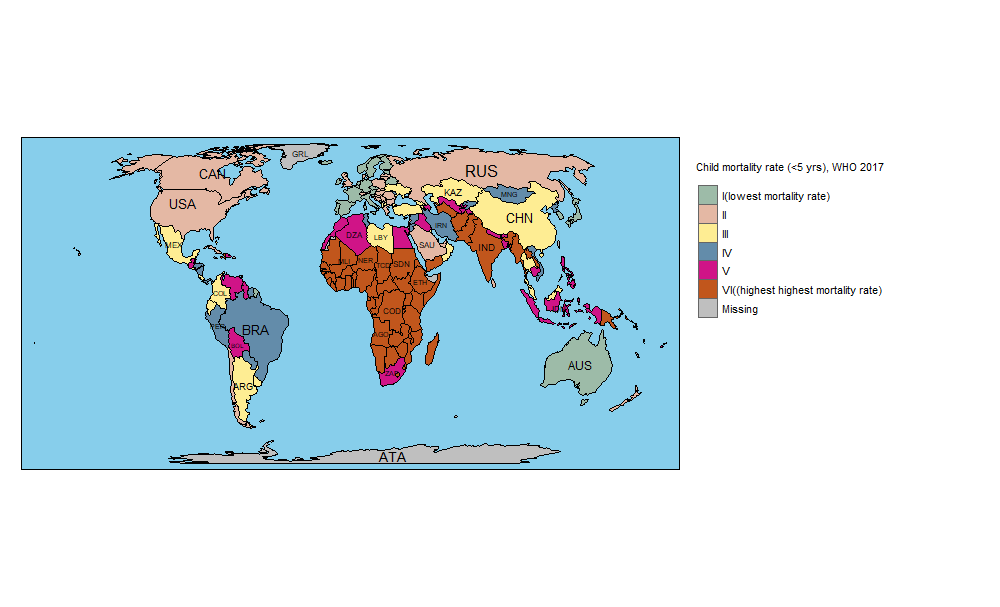

In [14]:
from IPython.display import Image
Image(filename='WHO_2017.png') 


Country of interest: Uganda. Located in the heart of sub-Saharan Africa, Uganda's under-5 child mortality rate is around 49 deaths per 1000 live births, which places it into the 6th group (countries with the highest mortality rates).

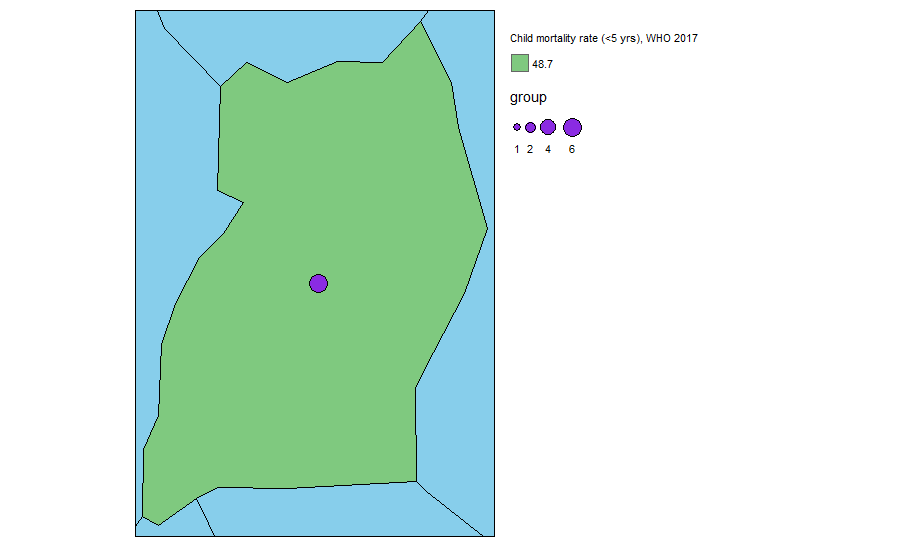

In [15]:
Image(filename='Uganda.png')

#### Table 1 - Baseline Characteristics
Assignment procedure: a randomized trial (simple randomization). To see whether the randomization is well-balanced, we compare the means of the subjects' pretrial covariates.

In [16]:
baseline = pd.read_csv("AEJ2018_HHmain.csv")
baseline.index.set_names("Household", inplace = True)
baseline.head()

,district,branchid,villageid,treatment,village_hhs_baseline,village_hhsu5_baseline,village_hhs_endline,village_share_immigrants,village_distance_road,village_distance_electricity,...,HH_meals,HH_electricity,HH_TV,HH_radio,HH_floor_material,HH_floor_material_oth,HH_roof_material,HH_roof_material_oth,HH_distanceVHT,HH_distanceCHP
Household,,,,,,,,,,,,,,,,,,,,,
0,10,41,1003,0,116,68,110,0.105263,6.00096,4.264567,...,2.0,0,0,1,1,NaN,1,NaN,0.072225,0.379127
1,10,41,1003,0,116,68,110,0.105263,6.00096,4.264567,...,2.0,0,0,0,1,NaN,1,NaN,0.054040,0.361292
2,10,41,1003,0,116,68,110,0.105263,6.00096,4.264567,...,4.0,0,0,1,1,NaN,1,NaN,0.029849,0.345872
3,10,41,1003,0,116,68,110,0.105263,6.00096,4.264567,...,3.0,0,0,1,6,NaN,2,NaN,0.050989,0.368697
4,10,41,1003,0,116,68,110,0.105263,6.00096,4.264567,...,0.0,0,0,0,1,NaN,1,NaN,0.058294,0.345088


In [17]:
pretrial_covariates = ["village_hhs_baseline", "village_hhsu5_baseline", "village_distance_road",
                      "village_distance_electricity", "village_distance_HF","village_HF_within5km",
                      "village_distance_HOSP"]
summary_statistics = baseline.groupby(["treatment", "villageid", "branchid"])[pretrial_covariates].mean()
summary_statistics = summary_statistics.groupby("treatment", as_index = False).agg(['mean', 'std'])
summary_statistics.columns = ["Households per cluster mean","Mean standard deviation",
                              "Households with under-5 children per cluster mean", "Mean standard deviation",
                              "Distance to main road mean", "Mean standard deviation",
                              "Distance to electricity translission line mean", "Mean standard deviation",
                              "Distance to health center mean","Mean standard deviation",
                              "Number of health centers within 5 km mean","Mean standard deviation",
                              "Distance to hospital mean","Mean standard deviation"]
summary_statistics = summary_statistics.round(decimals=1)
summary_statistics.T

treatment,0,1
Households per cluster mean,221.1,249.8
Mean standard deviation,107.0,112.8
Households with under-5 children per cluster mean,78.0,86.5
Mean standard deviation,45.7,47.0
Distance to main road mean,6.8,5.6
Mean standard deviation,12.7,11.6
Distance to electricity translission line mean,1.8,1.8
Mean standard deviation,1.5,1.5
Distance to health center mean,1.7,1.4
Mean standard deviation,1.2,1.1


In [18]:
df = pd.read_stata("AEJ2018_child_mortality.dta", convert_missing = False) 
treated = df[df.treatment == 1]
control = df[df.treatment == 0]
treated.count()
control.count()
print("Trial beginning: 115 treated clusters, 99 control clusters")

Trial beginning: 115 treated clusters, 99 control clusters


Comparing the difference in means of the subsamples of treated and untreated using a simple t-test.

In [19]:
treated = baseline[baseline.treatment==1]
treated = treated['village_hhs_baseline']
control = baseline[baseline.treatment == 0]
control = control['village_hhs_baseline']
control.describe()

count    3228.000000
mean      228.016419
std       104.149097
min        51.000000
25%       132.000000
50%       209.000000
75%       310.000000
max       430.000000
Name: village_hhs_baseline, dtype: float64

In [20]:
for column in pretrial_covariates:
    treated = baseline[baseline.treatment==1][column]
    control = baseline[baseline.treatment == 0][column] 
    stat = ttest_ind(treated, control)[1]

    print(f"{column:<7}     {stat:7.3f}")

village_hhs_baseline       0.000
village_hhsu5_baseline       0.000
village_distance_road       0.000
village_distance_electricity       0.293
village_distance_HF       0.000
village_HF_within5km       0.000
village_distance_HOSP       0.000


In [21]:
for column in pretrial_covariates:

    treated = baseline.query("treatment == 1")[column]
    control = baseline.query("treatment == 0")[column]

    stat = ttest_ind(treated, control)[1]

    print(f"{column:<7}     {stat:7.3f}")

village_hhs_baseline       0.000
village_hhsu5_baseline       0.000
village_distance_road       0.000
village_distance_electricity       0.293
village_distance_HF       0.000
village_HF_within5km       0.000
village_distance_HOSP       0.000


In [22]:
def compare_2_groups (arr_1, arr_2, alpha):
    stat,p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat,p))
    if p > alpha:
        print("difference in means is not statistically significant")
    else:
        print ("difference in means is statistically significant")

In [23]:
compare_2_groups(treated, control, 0.05) 

Statistics=-3.643, p=0.000
difference in means is statistically significant


In [71]:
#wrong p value result, redo

### Table 3 - Treatment Impact on Child Mortality


In [10]:
df = pd.read_stata("AEJ2018_child_mortality.dta", convert_missing = False) 
df.isnull().sum()
df_new = df.drop(df[df.datedeath_cmc< 1333].index)
df_new.describe()


,branchid,villageid,treatment,hhid,childID,female,datebirth_m,datebirth_yr,datebirth_cmc,died,datedeath_m,datedeath_yr,datedeath_cmc,aad,dateofinterview_m,dateofinterview_yr
count,11342.000000,11342.000000,11342.000000,11342.000000,11342.000000,11342.000000,11342.000000,11342.000000,11342.000000,11342.000000,390.000000,389.000000,389.000000,389.000000,11342.000000,11342.000000
mean,16.427438,1431.536942,0.535796,143175.980515,1.436078,0.495944,6.603157,2010.790649,1336.248047,0.034297,6.415385,2012.015381,1350.598999,6.871465,10.004937,2012.734985
std,15.452450,249.285194,0.498739,24927.929774,0.676039,0.499998,3.355597,1.401899,16.562693,0.182014,3.053383,0.792863,9.564947,10.885013,0.952230,0.265033
min,1.000000,1001.000000,0.000000,100102.000000,1.000000,0.000000,1.000000,2008.000000,1304.000000,0.000000,1.000000,2011.000000,1333.000000,0.000000,9.000000,2013.000000
25%,1.000000,1308.000000,0.000000,130820.500000,1.000000,0.000000,4.000000,2010.000000,1322.000000,0.000000,4.000000,2011.000000,1342.000000,0.000000,9.000000,2013.000000
50%,5.000000,1412.000000,1.000000,141247.500000,1.000000,0.000000,7.000000,2011.000000,1337.000000,0.000000,6.500000,2012.000000,1350.000000,0.000000,10.000000,2013.000000
75%,32.000000,1633.000000,1.000000,163320.750000,2.000000,1.000000,9.000000,2012.000000,1350.000000,0.000000,9.000000,2013.000000,1359.000000,11.000000,11.000000,2013.000000
max,42.000000,1910.000000,1.000000,191042.000000,6.000000,1.000000,12.000000,2013.000000,1368.000000,1.000000,12.000000,2013.000000,1368.000000,48.000000,12.000000,2013.000000


Generating indicators whether a child died before 5 years (60 motnhs), 1 year(12 months), or whether a neonatal death occured(before 1 month of life)

In [11]:
df_new['death_u5'] = np.where((df_new['died']==1) & (df_new['aad']<60), 1, 0) 
df_new['death_u1'] = np.where((df_new['died']==1) & (df_new['aad']<12), 1, 0)
df_new['death_u1m'] = np.where((df_new['died'] == 1) & (df_new['aad']<1), 1,0)


In [12]:
df_new = df_new.groupby(['villageid', 'branchid', 'treatment'], as_index = True)[['death_u5', 
'death_u1','death_u1m']].sum().reset_index()
df_new.count()

villageid    214
branchid     214
treatment    214
death_u5     214
death_u1     214
death_u1m    214
dtype: int64

In [13]:
df_new.describe()

,villageid,branchid,treatment,death_u5,death_u1,death_u1m
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1427.602804,16.691589,0.537383,1.817757,1.373832,0.953271
std,255.135766,15.477630,0.499770,1.846062,1.535333,1.224808
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1306.250000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1411.500000,5.000000,1.000000,1.000000,1.000000,1.000000
75%,1632.750000,31.000000,1.000000,2.750000,2.000000,1.000000
max,1910.000000,42.000000,1.000000,14.000000,11.000000,7.000000


In [14]:
print(df_new.columns)
df_new = df_new.set_index(['branchid', 'villageid'], drop = False)


Index(['villageid', 'branchid', 'treatment', 'death_u5', 'death_u1',
       'death_u1m'],
      dtype='object')


#### Program impact on the number of deaths

Below I've reproduced the results by Björkman et al. on the treatment impact on the number of deaths in 3 groups: under-5, infants, neonatal. Following the authors approach, I used the method of OLS with branch fixed effects.

Program impact on the number of under-5 deaths:

In [15]:
from linearmodels import PanelOLS
model = PanelOLS(df_new.death_u5,df_new.treatment, entity_effects = True)
res = model.fit(cov_type='robust', cluster_effects = True)
print(res)
#model

                          PanelOLS Estimation Summary                           
Dep. Variable:               death_u5   R-squared:                        0.0280
Estimator:                   PanelOLS   R-squared (Between):             -0.2985
No. Observations:                 214   R-squared (Within):               0.0280
Date:                Tue, Jun 23 2020   R-squared (Overall):             -0.1768
Time:                        01:05:16   Log-likelihood                   -417.21
Cov. Estimator:                Robust                                           
                                        F-statistic:                      5.7951
Entities:                          12   P-value                           0.0170
Avg Obs:                       17.833   Distribution:                   F(1,201)
Min Obs:                       6.0000                                           
Max Obs:                       60.000   F-statistic (robust):             6.2657
                            

Manual comparison of outcome means in the control and treatment groups.

In [16]:
treated = df_new[df_new.treatment == 1]
control = df_new[df_new.treatment == 0]
Y1 = treated["death_u5"].mean()
Y0 = control["death_u5"].mean()
ATE = Y1-Y0
ATE

-0.489503732981994

Mean control:


In [17]:
model = sm.OLS(df_new['death_u5'],add_constant(df_new['treatment']))
res = model.fit()
res.summary2(yname="Under-5 deaths", xname=["Intercept", "Program impact"],
             title="Program Impact on Child Mortality", alpha=0.05, float_format='%.4f')

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Program Impact on Child Mortality
=================================================================
Model:              OLS              Adj. R-squared:     0.013   
Dependent Variable: Under-5 deaths   AIC:                868.8993
Date:               2020-06-23 01:05 BIC:                875.6313
No. Observations:   214              Log-Likelihood:     -432.45 
Df Model:           1                F-statistic:        3.790   
Df Residuals:       212              Prob (F-statistic): 0.0529  
R-squared:          0.018            Scale:              3.3639  
-----------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           2.0808   0.1843 11.2883 0.0000  1.7174 2.4442
Program impact     -0.4895   0.2515 -1.9467 0.0529 -0.9852 0.0062
-----------------------------------------------------------------
Omnibus:              126.014      Durbin-Watson:         1.897  
Prob(Omnibus):        0.000        Jarque-Bera (JB):      968.651
Skew:                 2.188        Prob(JB):              0.000  
Kurtosis:             12.459       Condition No.:         3      
=================================================================

"""

Program impact on the number of infant deaths: 

In [18]:
model = PanelOLS(df_new['death_u1'],add_constant(df_new['treatment']), entity_effects = True)
res = model.fit(cov_type = 'robust', cluster_effects = True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               death_u1   R-squared:                        0.0345
Estimator:                   PanelOLS   R-squared (Between):             -0.0183
No. Observations:                 214   R-squared (Within):               0.0345
Date:                Tue, Jun 23 2020   R-squared (Overall):              0.0208
Time:                        01:05:33   Log-likelihood                   -375.92
Cov. Estimator:                Robust                                           
                                        F-statistic:                      7.1846
Entities:                          12   P-value                           0.0080
Avg Obs:                       17.833   Distribution:                   F(1,201)
Min Obs:                       6.0000                                           
Max Obs:                       60.000   F-statistic (robust):             7.8213
                            

Mean control:

In [19]:
model = sm.OLS(df_new['death_u1'],add_constant(df_new['treatment']))
res = model.fit()
res.summary2(yname="Infant deaths", xname=["Intercept", "Program impact"],
             title="Program Impact on Child Mortality", alpha=0.05, float_format='%.4f')

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Program Impact on Child Mortality
=================================================================
Model:              OLS              Adj. R-squared:     0.017   
Dependent Variable: Infant deaths    AIC:                789.1457
Date:               2020-06-23 01:05 BIC:                795.8776
No. Observations:   214              Log-Likelihood:     -392.57 
Df Model:           1                F-statistic:        4.668   
Df Residuals:       212              Prob (F-statistic): 0.0318  
R-squared:          0.022            Scale:              2.3173  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          1.6162   0.1530 10.5635 0.0000  1.3146  1.9177
Program impact    -0.4509   0.2087 -2.1607 0.0318 -0.8623 -0.0395
-----------------------------------------------------------------
Omnibus:              112.745      Durbin-Watson:         1.829  
Prob(Omnibus):        0.000        Jarque-Bera (JB):      665.563
Skew:                 2.005        Prob(JB):              0.000  
Kurtosis:             10.652       Condition No.:         3      
=================================================================

"""

Program impact on the number of neonatal deaths:

In [20]:
from linearmodels import PanelOLS
X = ['treatment']
X = add_constant(df_new[X])
model = PanelOLS(df_new.death_u1m,X, entity_effects = True)
res = model.fit(cov_type='robust', cluster_entity=True)
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:              death_u1m   R-squared:                        0.0162
Estimator:                   PanelOLS   R-squared (Between):             -0.0141
No. Observations:                 214   R-squared (Within):               0.0162
Date:                Tue, Jun 23 2020   R-squared (Overall):              0.0071
Time:                        01:05:44   Log-likelihood                   -327.59
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.3115
Entities:                          12   P-value                           0.0703
Avg Obs:                       17.833   Distribution:                   F(1,201)
Min Obs:                       6.0000                                           
Max Obs:                       60.000   F-statistic (robust):             3.5197
                            

Mean control:

In [21]:
model = sm.OLS(df_new['death_u1m'],add_constant(df_new['treatment']))
res = model.fit()
res.summary2(yname="Neonatal deaths", xname=["Intercept", "Program impact"],
             title="Program Impact on Child Mortality", alpha=0.05, float_format='%.4f')

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Program Impact on Child Mortality
=================================================================
Model:              OLS              Adj. R-squared:     0.003   
Dependent Variable: Neonatal deaths  AIC:                695.3864
Date:               2020-06-23 01:05 BIC:                702.1184
No. Observations:   214              Log-Likelihood:     -345.69 
Df Model:           1                F-statistic:        1.699   
Df Residuals:       212              Prob (F-statistic): 0.194   
R-squared:          0.008            Scale:              1.4952  
-----------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           1.0707   0.1229  8.7123 0.0000  0.8285 1.3130
Program impact     -0.2185   0.1676 -1.3035 0.1938 -0.5490 0.1119
-----------------------------------------------------------------
Omnibus:             81.769       Durbin-Watson:          1.724  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       218.602
Skew:                1.706        Prob(JB):               0.000  
Kurtosis:            6.587        Condition No.:          3      
=================================================================

"""

So far, I've replicated the first part of table-3 (Program Impact on Child Mortality). In particular, I've estimated the effect of the program on the number of child deaths in three age groups using the same method as  in the original paper - OlS with fixed effects. My results  coincide with the results of the paper, estimations of the treatment effects on the number of child deaths are very similar to the original findings in all 3 age groups.

#### Program impact on the Mortality per 1,000 years of exposure

In [22]:
data_2 = pd.read_stata("AEJ2018_child_mortality_computation.dta") 
data_2.head()


,branchid,villageid,treatment,hhid,childID,female,datebirth_m,datebirth_yr,datebirth_cmc,died,...,dateofinterview_yr,count_month_u5,death_under5,date12m_cmc,aabeginning,aaend,count_month_u1,death_under1,count_month_u1m,death_under1m
0,31,1403,1,140301,1,1.0,10.0,2012.0,1354.0,0.0,...,2013.0,14.5,0.0,1366.0,-21.5,14.5,12.0,0.0,1.0,0.0
1,31,1403,1,140302,1,0.0,6.0,2013.0,1362.0,0.0,...,2013.0,6.5,0.0,1374.0,-29.5,6.5,6.5,0.0,1.0,0.0
2,31,1403,1,140303,1,1.0,2.0,2010.0,1322.0,0.0,...,2013.0,36.0,0.0,1334.0,10.5,46.5,1.5,0.0,NaN,NaN
3,31,1403,1,140305,1,1.0,11.0,2011.0,1343.0,0.0,...,2013.0,25.5,0.0,1355.0,-10.5,25.5,12.0,0.0,1.0,0.0
4,31,1403,1,140306,2,1.0,4.0,2011.0,1336.0,0.0,...,2013.0,32.5,0.0,1348.0,-3.5,32.5,12.0,0.0,1.0,0.0


In [23]:
data_2 = data_2.groupby(['villageid', 'branchid', 'treatment'], as_index = True)[['death_under5','count_month_u5',
'death_under1', 'count_month_u1','death_under1m','count_month_u1m']].sum().reset_index()



In [24]:
data_2['count_month_u5'] = data_2.apply(lambda row: row.count_month_u5/12, axis = 1)
data_2['count_month_u1'] = data_2.apply(lambda row: row.count_month_u1/12, axis = 1)
data_2['mrate_u5'] = (data_2['death_under5']/data_2['count_month_u5'])*1000
data_2['mrate_u1'] = (data_2['death_under1']/data_2['count_month_u1'])*1000
data_2['mrate_u1m'] = (data_2['death_under1m']/data_2['count_month_u1m'])*1000
data_2.head()

,villageid,branchid,treatment,death_under5,count_month_u5,death_under1,count_month_u1,death_under1m,count_month_u1m,mrate_u5,mrate_u1,mrate_u1m
0,1001,41,1,0.0,101.416667,0.0,31.958333,0.0,28.0,0.000000,0.000000,0.000000
1,1002,41,1,0.0,113.958333,0.0,31.416667,0.0,31.0,0.000000,0.000000,0.000000
2,1003,41,0,4.0,89.958333,3.0,28.000000,1.0,27.0,44.465030,107.142857,37.037037
3,1004,42,0,0.0,55.833333,0.0,18.208333,0.0,18.0,0.000000,0.000000,0.000000
4,1005,42,1,3.0,85.125000,3.0,27.875000,3.0,34.0,35.242291,107.623318,88.235298


In [25]:
data_2 = data_2.set_index(['villageid', 'branchid'], drop = False)
data_2.columns

Index(['villageid', 'branchid', 'treatment', 'death_under5', 'count_month_u5',
       'death_under1', 'count_month_u1', 'death_under1m', 'count_month_u1m',
       'mrate_u5', 'mrate_u1', 'mrate_u1m'],
      dtype='object')

In [26]:
model = PanelOLS(data_2.mrate_u5, data_2.treatment, entity_effects = True, drop_absorbed = True)
#res = model.fit(cov_type = 'clustered', cluster_entity = True)
print(res)

In [27]:
model = PanelOLS(data_2.mrate_u5, data_2.treatment, entity_effects = True, drop_absorbed=True)
print(res)

In [28]:
model = PanelOLS(data_2.mrate_u1,data_2.treatment, entity_effects = True)
#res = model.fit(cov_type = 'clustered', cluster_entity = True)
print(res)

In [29]:
mod = sm.OLS(data_2['mrate_u5'], add_constant(data_2['treatment']))
res = model.fit()
res.summary2(yname="Under-5 mortality", xname=["Intercept", "Program impact"],
             title="Program Impact on Child Mortality", alpha=0.05, float_format='%.4f')

AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          treatment

Set drop_absorbed=True to automatically drop absorbed variables.


In [30]:
model = sm.OLS(data_2['mrate_u1'],add_constant(data_2['treatment']))
res = model.fit()
res.summary2(yname="Infant mortality", xname=["Intercept", "Program impact"],
             title="Program Impact on Child Mortality", alpha=0.05, float_format='%.4f')

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Program Impact on Child Mortality
==================================================================
Model:              OLS              Adj. R-squared:     0.028    
Dependent Variable: Infant mortality AIC:                2239.0321
Date:               2020-06-23 01:06 BIC:                2245.7640
No. Observations:   214              Log-Likelihood:     -1117.5  
Df Model:           1                F-statistic:        7.104    
Df Residuals:       212              Prob (F-statistic): 0.00828  
R-squared:          0.032            Scale:              2029.6   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept         52.7025   4.5278 11.6398 0.0000  43.7772 61.6277
Program impact   -16.4630   6.1765 -2.6654 0.0083 -28.6383 -4.2877
------------------------------------------------------------------
Omnibus:               51.333       Durbin-Watson:          1.891 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       90.510
Skew:                  1.241        Prob(JB):               0.000 
Kurtosis:              4.999        Condition No.:          3     
==================================================================

"""